# Constaint Satisfaction Problems

## Chapter 3

In [1]:
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod

V = TypeVar('V')
D = TypeVar('D')

# Base class for all constraints
class Constraint(Generic[V, D], ABC):
    # Variables that the constraint is between
    def __init__(self, variables: List[V]) -> None:
        self.variables = variables
    
    # Must be overriden by subclasses
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        ...

## Constraint Satisfaction Problem: Variables, Domains, Constraints

In [2]:
class CSP(Generic[V, D]):
    """
    A constraint satisfaction problem that has variables, domains, and constraints
    which limit the possible assignments of a variables value.
    """
    def __init__(self, variables: List[V], domains: [Dict[V, List[D]]]) -> None:
        self.variables: List[V] = variables
        self.domains: Dict[V, D]= domains
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")
        
        self.assignment_history = []
            
    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP.")
            else:
                self.constraints[variable].append(constraint)
                
    # Make sure that a value assigned to a variable is allowed (consistent)
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        for constraint in self.constraints[variable]:
            # If any of the constraints are violated by the assignment, return False
            if not constraint.satisfied(assignment):
                return False
            
        return True
    
    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # Assignment is complete if every variables is assigned 
        # Base case
        if len(assignment) == len(self.variables):
            return assignment
    
        # All variables in the csp but not assigned yet
        unassigned: List[V] = [v for v in self.variables if v not in assignment]
        
        # Every possible domain value of first unassigned variable
        first: V = unassigned[0]
        
        for value in self.domains[first]:
            local_assignment = assignment.copy()
            local_assignment[first] = value
            
            # Continue recursively if still consistent
            if self.consistent(first, local_assignment):
                self.assignment_history.append(dict(assignment=local_assignment, consistent=True))
                result: Optional[Dict[V, D]] = self.backtracking_search(local_assignment)
                # Backtrack if we did not find the result with any of the domain values
                if result is not None:
                    return result
            else:
                self.assignment_history.append(dict(assignment=local_assignment, consistent=False))
        return None


In [3]:
class PositiveConstraint(Constraint):
    """
    A simple constraint that checks if an assignment is positive.
    """
    def satisfied(self, assignment):
        for value in assignment.values():
            if value < 0:
                return False
        return True

In [4]:
pos_con = PositiveConstraint(['a', 'b', 'c', 'd'])
pos_con.satisfied(dict(a=-1))
pos_con.satisfied(dict(a=2))

False

True

In [5]:
test = CSP(variables=['a', 'b', 'c', 'd'], domains=dict(a=[1, 2, 3], b=[4, 5, 6], c=[7, 8, 9], d=[10, 11, 12]))
test.add_constraint(pos_con)

In [6]:
test.consistent('a', dict(a=1))

True

In [7]:
test.consistent('b', dict(b=-1))

False

# Map Coloring Problem

Color a map of Australia with 3 colors such that each of the 7 territories is not neighboring a territory of the same color.

In [8]:
class MapColoringConstraint(Constraint[str, str]):
    """
    Checks whether two territories have the same color.
    """
    def __init__(self, place1: str, place2: str) -> None:
        super().__init__([place1, place2])
        # Also could use `Constraint().__int__([place1, place2])`
        self.place1: str = place1
        self.place2: str = place2
        
        
    def satisfied(self, assignment: Dict[str, str]) -> bool:
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        if assignment[self.place1] == assignment[self.place2]:
            return False

        return True

In [9]:
mcc = MapColoringConstraint('a', 'b')
mcc.satisfied(dict(a='blue', b='red'))
mcc.satisfied(dict(a='orange', b='orange'))

True

False

In [10]:
variables: List[str] = ["Western Australia", "Northern Territory", "South Australia", "Queensland", "New South Wales", "Victoria", "Tasmania"]
domains: Dict[str, List[str]] = {}
for variable in variables:
    domains[variable] = ["red", "green", "blue"]

In [11]:
map_coloring_csp = CSP(variables, domains)
map_coloring_csp.add_constraint(MapColoringConstraint("Western Australia", "Northern Territory"))
map_coloring_csp.add_constraint(MapColoringConstraint("Western Australia", "South Australia"))
map_coloring_csp.add_constraint(MapColoringConstraint("South Australia", "Northern Territory"))
map_coloring_csp.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
map_coloring_csp.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
map_coloring_csp.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
map_coloring_csp.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
map_coloring_csp.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
map_coloring_csp.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
map_coloring_csp.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))

In [12]:
map_coloring_csp.consistent('Western Australia', {'Western Australia': 'red', 'Northern Territory': 'red'})
map_coloring_csp.consistent('Western Australia', {'Western Australia': 'red', 'Northern Territory': 'blue'})

False

True

In [13]:
solution = map_coloring_csp.backtracking_search(assignment={'Victoria': 'green'})
solution

{'Victoria': 'green',
 'Western Australia': 'green',
 'Northern Territory': 'red',
 'South Australia': 'blue',
 'Queensland': 'green',
 'New South Wales': 'red',
 'Tasmania': 'red'}

In [14]:
map_coloring_csp.assignment_history

[{'assignment': {'Victoria': 'green', 'Western Australia': 'red'},
  'consistent': True},
 {'assignment': {'Victoria': 'green',
   'Western Australia': 'red',
   'Northern Territory': 'red'},
  'consistent': False},
 {'assignment': {'Victoria': 'green',
   'Western Australia': 'red',
   'Northern Territory': 'green'},
  'consistent': True},
 {'assignment': {'Victoria': 'green',
   'Western Australia': 'red',
   'Northern Territory': 'green',
   'South Australia': 'red'},
  'consistent': False},
 {'assignment': {'Victoria': 'green',
   'Western Australia': 'red',
   'Northern Territory': 'green',
   'South Australia': 'green'},
  'consistent': False},
 {'assignment': {'Victoria': 'green',
   'Western Australia': 'red',
   'Northern Territory': 'green',
   'South Australia': 'blue'},
  'consistent': True},
 {'assignment': {'Victoria': 'green',
   'Western Australia': 'red',
   'Northern Territory': 'green',
   'South Australia': 'blue',
   'Queensland': 'red'},
  'consistent': True},
 {'

In [15]:
import plotly_express as px

px.set_mapbox_access_token(open('/Users/williamkoehrsen/mapbox_secret.txt', 'r').read())

In [16]:
variables

['Western Australia',
 'Northern Territory',
 'South Australia',
 'Queensland',
 'New South Wales',
 'Victoria',
 'Tasmania']

In [22]:
centers = {"Western Australia": (122.29, -25.32), "Northern Territory": (133.36, -19.38), "South Australia": (135, -30.06),
           "Queensland": (144.43, -22.49), "New South Wales": (147.02, -32.16), "Victoria": (144.28, -36.85), "Tasmania": (146.59, -42.02)}

df = pd.DataFrame([dict(state=state, lon=center[0], lat=center[1]) for state, center in centers.items()])

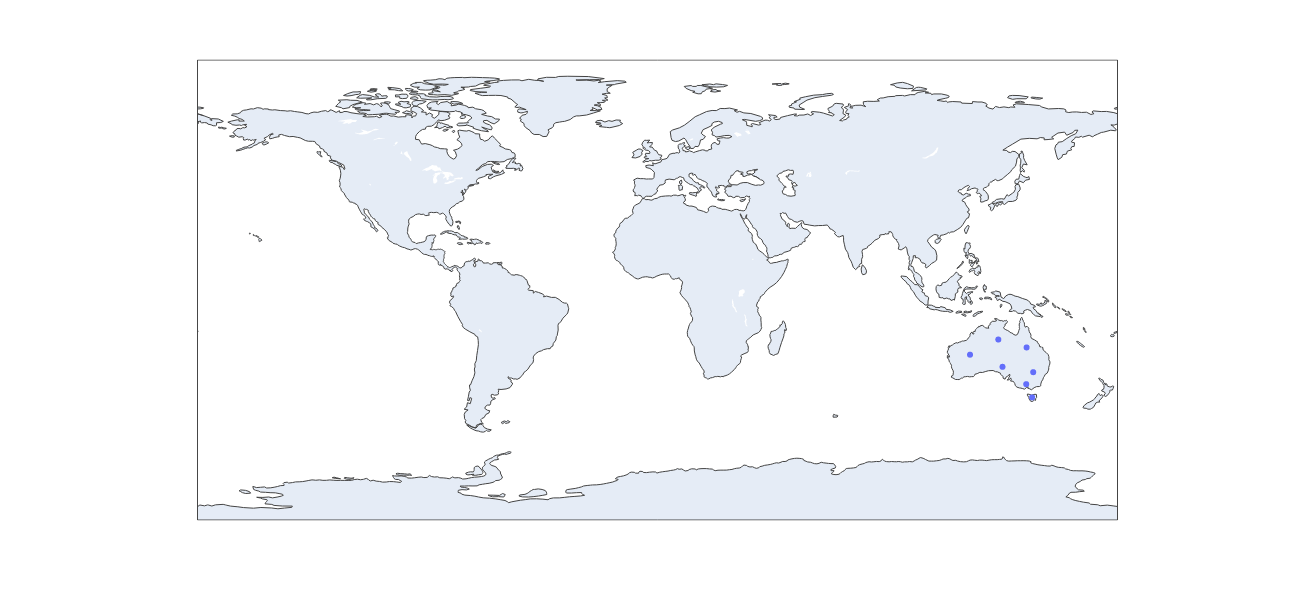

In [23]:
px.scatter_geo(df, lat='lat', lon='lon', text='state')

In [85]:
frames = []
for num, assignment in enumerate(map_coloring_csp.assignment_history):
    frame = df.copy()
    frame['color'] = frame['state'].map(assignment['assignment'])
    frame['color'] = frame['color'].fillna('black')
    frame['consistent'] = assignment['consistent']
    frame['size'] = 100 if assignment['consistent'] else 20
    frame['frame'] = num
    frames.append(frame)
    
frames=pd.concat(frames)

frames.tail(14)

,lat,lon,state,color,consistent,size,frame
0,-25.32,122.29,Western Australia,green,True,100,23
1,-19.38,133.36,Northern Territory,red,True,100,23
2,-30.06,135.00,South Australia,blue,True,100,23
3,-22.49,144.43,Queensland,green,True,100,23
4,-32.16,147.02,New South Wales,red,True,100,23
5,-36.85,144.28,Victoria,green,True,100,23
6,-42.02,146.59,Tasmania,black,True,100,23
0,-25.32,122.29,Western Australia,green,True,100,24
1,-19.38,133.36,Northern Territory,red,True,100,24
2,-30.06,135.00,South Australia,blue,True,100,24


In [86]:
frames['size'] = 100
fig = px.scatter_mapbox(
    frames[frames['frame'] >= 5],
    lat="lat",
    lon="lon",
    color="color",
    color_discrete_map=dict(black="black", red="red", blue="blue", green="green"),
    animation_frame="frame",
    animation_group="state",
    title="Australia Map Coloring CSP",
    size='size', zoom=5,
    
)

In [88]:
# fig

# Eight Queens Problem

Each queen must be placed on a chessboard without attacking any others. Queens can move along any row, column, diagonal and must not be able to attack one another.

In [90]:
columns = [1, 2, 3, 4, 5, 6, 7, 8]
rows = {}
for column in columns:
    # Domain for each queen (in her own column) is all of the rows
    rows[column] = [1, 2, 3, 4, 5, 6, 7, 8]

queen_csp = CSP(variables=columns, domains=rows)

In [93]:
from collections import Counter

class QueenConstraint(Constraint):
    def __init__(self, columns):
        super().__init__(columns)
        self.columns = columns
        
    def satisfied(self, assignment):
        # Iterate through each queen assigned
        for q1c, q1r in assignment.items():
            # Check each queen against others
            for q2c in range(q1c + 1, len(self.columns) + 1):
                # If the second queen is in the assignment

                if q2c in assignment:
                    # Queens are indexed by column
                    q2r = assignment[q2c]
                    # On same row not allowed
                    if q1r == q2r:
                        return False
                
                    # Check if on same diagonal
                    if abs(q1r - q2r) == abs(q1c - q2c):
                        return False
        # Assignment is valid here
        return True
    

In [94]:
queen_csp.add_constraint(QueenConstraint(columns))
solution = queen_csp.backtracking_search()
print(solution)

{1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2, 8: 4}


In [106]:
queen_csp.assignment_history[-10:]

[{'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 4}, 'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 5}, 'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 6}, 'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7}, 'consistent': True},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 1},
  'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2},
  'consistent': True},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2, 8: 1},
  'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2, 8: 2},
  'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2, 8: 3},
  'consistent': False},
 {'assignment': {1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2, 8: 4},
  'consistent': True}]

# Word Search Constraint Satisfaction Problem

In [108]:
from typing import NamedTuple, List, Dict, Optional
from random import choice
from string import ascii_uppercase

Grid = List[List[str]]  # type alias for grids


class GridLocation(NamedTuple):
    row: int
    column: int

In [109]:
def generate_grid(rows: int, columns: int) -> Grid:
    # initialize grid with random letters
    return [[choice(ascii_uppercase) for c in range(columns)] for r in
     range(rows)]

def display_grid(grid: Grid) -> None:
    for row in grid:
        print("".join(row))

In [110]:
display_grid(generate_grid(11, 11))

XLYSVXSLONV
JFOAPHWQJMC
RHNTXLIRROT
DJFCPEWLRAI
ICCQZQAMQVE
JGISPZJPQWH
BWIZSHHYEWA
QHHXPJBYSDS
XXPRIGCMWFS
GTUYRILAEAR
USNXEUUHWGJ


## Domain of a Word

In [111]:
def generate_domain(word, grid):
    """
    Each word has a domain which is a list of lists of the acceptable locations 
    for each letter in the word.
    """
    domain = []
    height = len(grid)
    width = len(grid[0])
    
    length = len(word)
    
    for row in range(height):
        for col in range(width):
            columns = range(col, col + length + 1)
            rows = range(row, row + length + 1)
            if col + length <= width:
                # Left to right
                domain.append([GridLocation(row, c) for c in columns])
                # Diagonal towards bottom right
                if row + length <= height:
                    domain.append([GridLocation(r, col + (r - row)) for r in rows])
                
            if row + length <= height:
                # Top to bottom
                domain.append([GridLocation(r, col) for r in rows])
                # Diagonal towards bottom left
                if col - length >= 0:
                    domain.append([GridLocation(r, col - (r - row)) for r in rows])
                
    return domain

In [117]:
grid = generate_grid(13, 13)
word = 'example'

domain = generate_domain(word, grid)
len(domain)
domain[-10]

273

[GridLocation(row=11, column=4),
 GridLocation(row=11, column=5),
 GridLocation(row=11, column=6),
 GridLocation(row=11, column=7),
 GridLocation(row=11, column=8),
 GridLocation(row=11, column=9),
 GridLocation(row=11, column=10),
 GridLocation(row=11, column=11)]

In [118]:
word = 'overly'
domain = generate_domain(word, grid)
len(domain)
domain[-15]

328

[GridLocation(row=11, column=1),
 GridLocation(row=11, column=2),
 GridLocation(row=11, column=3),
 GridLocation(row=11, column=4),
 GridLocation(row=11, column=5),
 GridLocation(row=11, column=6),
 GridLocation(row=11, column=7)]

In [119]:
word = 'multiplewordsknittogether'
domain = generate_domain(word, grid)

In [120]:
class WordSearchConstraint(Constraint):
    """
    Two words cannot share the same location in the grid.
    """
    def __init__(self, words):
        super().__init__(words)
        self.words = words
    
    def satisfied(self, assignment):
        all_locations = [locs for values in assignment.values() for locs in values]
        # If the length of the set of all locations is equal to the len of all_locations, then
        # there are no repeats and the constraint is satisfied
        len_equal = len(set(all_locations)) == len(all_locations)
        return len_equal

In [123]:
from random_word import RandomWords
r = RandomWords()
words = r.get_random_words()
len(words)

50

In [127]:
words[10]
words[11]

'infonaut'

'zinger'

In [130]:
assignment = {}
assignment[words[10]] = generate_domain(words[10], grid)[10]
assignment

{'infonaut': [GridLocation(row=0, column=3),
  GridLocation(row=1, column=4),
  GridLocation(row=2, column=5),
  GridLocation(row=3, column=6),
  GridLocation(row=4, column=7),
  GridLocation(row=5, column=8),
  GridLocation(row=6, column=9),
  GridLocation(row=7, column=10),
  GridLocation(row=8, column=11)]}

In [131]:
assignment[words[11]] = generate_domain(words[11], grid)[11]

In [132]:
wsc = WordSearchConstraint(words)
wsc.satisfied(assignment)

False

In [137]:
all_locations = [locs for values in assignment.values() for locs in values]
all_locations

[GridLocation(row=0, column=3),
 GridLocation(row=1, column=4),
 GridLocation(row=2, column=5),
 GridLocation(row=3, column=6),
 GridLocation(row=4, column=7),
 GridLocation(row=5, column=8),
 GridLocation(row=6, column=9),
 GridLocation(row=7, column=10),
 GridLocation(row=8, column=11),
 GridLocation(row=0, column=3),
 GridLocation(row=1, column=3),
 GridLocation(row=2, column=3),
 GridLocation(row=3, column=3),
 GridLocation(row=4, column=3),
 GridLocation(row=5, column=3),
 GridLocation(row=6, column=3)]

In [138]:
len(set(all_locations))

15

In [170]:
words = r.get_random_words()[:12]
grid = generate_grid(14, 14)
locations = {}

for word in words:
    locations[word] = generate_domain(word, grid)
    
word_search_csp = CSP(words, locations)

In [171]:
word_search_csp.add_constraint(WordSearchConstraint(words))
solution = word_search_csp.backtracking_search()

In [172]:
import random

if solution is not None:
    # Iterate through each word
    for word, grid_locations in solution.items():
        if random.choice([True, False]):
            # Random reverse half of the time
            grid_locations.reverse()
        # Iterate through each letter in word
        for index, letter in enumerate(word):
            # Extract the location of the word in the grid
            (row, col) = (grid_locations[index].row, grid_locations[index].column)
            grid[row][col] = letter
            
    display_grid(grid)

mixtilinealUtI
abbotshipsKBhs
DetalucameHpop
XsymalepJOaiti
polyptychOwhhh
HFMIUMNRJHkses
JXPNPSREMMsert
MIRVTZZVFNZnUs
JJNSDMPVPLOaKo
JUJUAYFIHYChTv
CUMBSDCEXBLtXo
Pedilahonagror
PetaksrellorFp
transpeciation


In [173]:
words

['mixtilineal',
 'thother',
 'provostships',
 'transpeciation',
 'abbotships',
 'thaneship',
 'emaculate',
 'Hawks',
 'pelamys',
 'polyptych',
 'organohalide',
 'rollerskate']

# Cryptarithmictic Puzzle

Find digits to replace letters that make a mathematical statement true. Each letter in the problem represents on digit and two letters cannot represent the same digit (repeated letters means a digit is repeated).

In [158]:
class SendMoreMoneyConstraint(Constraint[str, int]):
    """
    Cryptarithmetic puzzle to represent letters as numbers.
    No two letters can represent the same number.
    """
    def __init__(self, letters: List[str]) -> None:
        super().__init__(letters)
        self.letters: List[str] = letters

    def satisfied(self, assignment: Dict[str, int]) -> bool:
        # if there are duplicate values, then it's not a solution
        if len(set(assignment.values())) < len(assignment):
            return False

        # if all variables have been assigned, check if it adds correctly
        if len(assignment) == len(self.letters):
            s: int = assignment["S"]
            e: int = assignment["E"]
            n: int = assignment["N"]
            d: int = assignment["D"]
            m: int = assignment["M"]
            o: int = assignment["O"]
            r: int = assignment["R"]
            y: int = assignment["Y"]
            send: int = s * 1000 + e * 100 + n * 10 + d
            more: int = m * 1000 + o * 100 + r * 10 + e
            money: int = m * 10000 + o * 1000 + n * 100 + e * 10 + y
            return send + more == money
        return True # no conflict

In [178]:
letters = ['S', 'E', 'N', 'D', 'M', 'O', 'R', 'Y']
possible_digits = {}

for letter in letters:
    possible_digits[letter] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

# Numbers cannot start with 0
possible_digits['M'] = [1]

crypt_csp = CSP(variables=letters, domains=possible_digits)

In [179]:
crypt_csp.add_constraint(SendMoreMoneyConstraint(letters))
solution = crypt_csp.backtracking_search()

print(solution)

{'S': 9, 'E': 5, 'N': 6, 'D': 7, 'M': 1, 'O': 0, 'R': 8, 'Y': 2}


In [181]:
letters = ['S', 'E', 'N', 'D', 'M', 'O', 'R', 'Y']
possible_digits = {}

for letter in letters:
    possible_digits[letter] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

# Numbers cannot start with 0
# Don't enforce constraint this time
# possible_digits['M'] = [1]

crypt_csp = CSP(variables=letters, domains=possible_digits)
crypt_csp.add_constraint(SendMoreMoneyConstraint(letters))
solution = crypt_csp.backtracking_search()

print(solution)

{'S': 2, 'E': 8, 'N': 1, 'D': 7, 'M': 0, 'O': 3, 'R': 6, 'Y': 5}
